In [173]:
import sys

from keras.models import Sequential
from keras.layers import InputLayer, Dense
import pandas as pd
import numpy as np

In [174]:
#Importing data
x_train = pd.read_csv('../pre-processamento-e-transformacao/X_TRAIN.csv')
x_test = pd.read_csv('../pre-processamento-e-transformacao/X_TEST.csv')
y_train = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN.csv')
y_test = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST.csv')
# y_train_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TRAIN_LOG.csv')
# y_test_log = pd.read_csv('../pre-processamento-e-transformacao/Y_TEST_LOG.csv')

In [175]:
# Transforming target variable
# y_train = np.expm1((y_train + abs(y_train.min())) / 10000)
# y_test = np.expm1((y_test + abs(y_test.min())) / 10000)

In [176]:
# Normalizar
from sklearn.preprocessing import MinMaxScaler
#
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)


In [177]:
# Creating model
input_neuron, hidden_neuron, output_neuron = np.size(x_train, 1), 3, 1

mlp = Sequential([
    InputLayer(input_neuron),
    Dense(hidden_neuron, activation="relu"),
    Dense(output_neuron)
])

In [178]:
# Summary representation
mlp.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 3)                 867       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 4         
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


In [179]:
# Compiling model
mlp.compile(optimizer="adam", loss="mse")

In [180]:
# Training the model
batch_size = 16

Log = mlp.fit(x_train, y_train, batch_size=batch_size, epochs=50)

Epoch 1/50
64/64 [==============================] - 0s 680us/step - loss: 64.0923
Epoch 2/50
64/64 [==============================] - 0s 545us/step - loss: 53.0674
Epoch 3/50
64/64 [==============================] - 0s 552us/step - loss: 50.5556
Epoch 4/50
64/64 [==============================] - 0s 994us/step - loss: 48.9413
Epoch 5/50
64/64 [==============================] - 0s 683us/step - loss: 47.7190
Epoch 6/50
64/64 [==============================] - 0s 559us/step - loss: 46.5867
Epoch 7/50
64/64 [==============================] - 0s 734us/step - loss: 45.5567

## Medidas Desempenho

* **r2_score**(y_test, y_pred)

* **Gráfico de Dispersão**

* **median_absolute_error**(y_test, y_pred)


(0.0, 100.0)

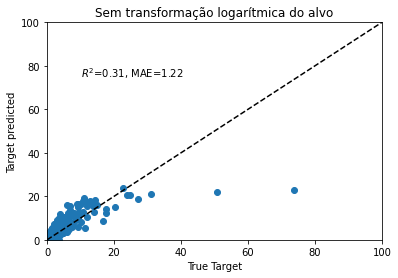

In [181]:
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, r2_score

y_pred = mlp.predict(x_test)

# print(y_test)
# print(y_pred)

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test, y_pred)
ax0.plot([0, 100], [0, 100], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Sem transformação logarítmica do alvo')
ax0.text(10, 75, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 100])
ax0.set_ylim([0, 100])


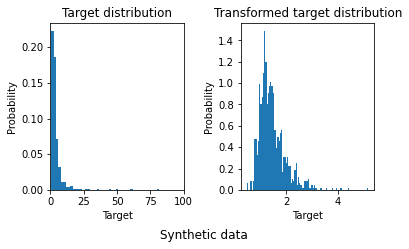

In [182]:
y_train_log = np.log1p(y_train)
# y_test_log = np.log1p(y_test)

## Y log

f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y_train, bins=100, density=True)
ax0.set_xlim([0, 100])
ax0.set_ylabel('Probability')
ax0.set_xlabel('Target')
ax0.set_title('Target distribution')

ax1.hist(y_train_log, bins=100, density=True)
ax1.set_ylabel('Probability')
ax1.set_xlabel('Target')
ax1.set_title('Transformed target distribution')

f.suptitle("Synthetic data", y=0.06, x=0.53)
f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])


Epoch 1/50
64/64 [==============================] - 0s 541us/step - loss: 12.3703
Epoch 2/50
64/64 [==============================] - 0s 649us/step - loss: 7.1980
Epoch 3/50
64/64 [==============================] - 0s 786us/step - loss: 5.2592
Epoch 4/50
64/64 [==============================] - 0s 693us/step - loss: 4.1209
Epoch 5/50
64/64 [==============================] - 0s 632us/step - loss: 3.3256
Epoch 6/50
64/64 [==============================] - 0s 585us/step - loss: 2.7639
Epoch 7/50
64/64 [==============================] - 0s 560us/step - loss: 2.3507
Epoch 8/50
64/64 [==============

(0.0, 100.0)

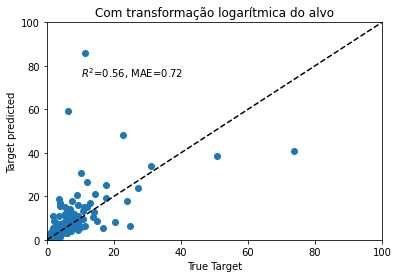

In [183]:
## Predicting with y log

Log = mlp.fit(x_train, y_train_log, batch_size=batch_size, epochs=50)

y_pred = np.expm1(mlp.predict(x_test))

r2 = r2_score(y_test, y_pred)

mae = median_absolute_error(y_test, y_pred)

# Plot results
ax0 = plt.axes()

ax0.scatter(y_test, y_pred)
ax0.plot([0, 100], [0, 100], '--k')
ax0.set_ylabel('Target predicted')
ax0.set_xlabel('True Target')
ax0.set_title('Com transformação logarítmica do alvo')
ax0.text(10, 75, r'$R^2$=%.2f, MAE=%.2f' % (
    r2, mae))
ax0.set_xlim([0, 100])
ax0.set_ylim([0, 100])